# Coding a Decision Tree

In [1]:
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def classify(features_train, labels_train):
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    return clf

In [3]:
clf = classify(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)

print acc

0.912


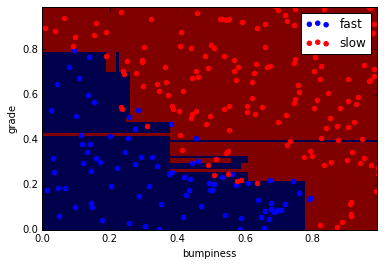

In [4]:
%matplotlib inline
prettyPicture(clf, features_test, labels_test)
plt.show()

# Decision Tree Accuracy

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf1 = DecisionTreeClassifier(min_samples_split=2)
clf1.fit(features_train, labels_train)
pred1 = clf1.predict(features_test)
acc_min_samples_split_2 = accuracy_score(pred1, labels_test)

clf2 = DecisionTreeClassifier(min_samples_split=50)
clf2.fit(features_train, labels_train)
pred2 = clf2.predict(features_test)
acc_min_samples_split_50 = accuracy_score(pred2, labels_test)

In [6]:
print '2: ', acc_min_samples_split_2
print '50: ', acc_min_samples_split_50

2:  0.908
50:  0.912


# Data Impurity and Entropy

_entropy_ is the thing that controls how a decision tree decides where to split the data. It's a measure of _impurity_ in bunch of examples.

If all your examples are of the same class, your entropy is `0`. If your examples are evenly split between two classes, the entropy is `1.0`.

−∑​i(pi)log​2(pi)

Here's some made-up data:

| Grade | Bumpiness | Speed Limit? | Speed |
|-------|-----------|--------------|-------|
| steep | bumpy     | yes          | slow  |
| steep | smooth    | yes          | slow  |
| flat  | bumpy     | no           | fast  |
| steep | smooth    | no           | fast  |


What is the entropy of this node?

```
SSFF
```

1. How many examples are slow? 2
1. How many examples total are there? 4

`Pi` is the fraction of slow examples to total examples:

1. `Pslow` is `0.5`.
2. `Pfast` is `0.5`.

What is the entropy of this node? Here's how to calculate it in Python:

In [7]:
import math

pslow = 0.5
pfast = 0.5

-pslow * math.log(pslow, 2) + -pfast * math.log(pfast, 2)

1.0

# Information Gain

The decision tree algorithm seeks to maximize information gain.

Using this made-up data as the parent:

| Grade | Bumpiness | Speed Limit? | Speed |
|-------|-----------|--------------|-------|
| steep | bumpy     | yes          | slow  |
| steep | smooth    | yes          | slow  |
| flat  | bumpy     | no           | fast  |
| steep | smooth    | no           | fast  |


Let's use information gain to decide which variable to split:

If we split based on `grade`, we have three values with `steep` and one value with `flat`. 

On the `steep` half, we have three total observations, and the speeds are `s,s,f`. On the `flat` half, we have one example and the speed is: `f`.

This is what the tree would look like:
    
![Node](01.png)

The entropy of the `flat` node is `0`, since all the values (the only value) are the same.

In order to calculate the entropy for the `steep` node, we have to calculate `pslow` and `pfast`. `pslow` is `2/3`, since two of the three observations are `slow`. `pfast` is `1/3` since the count of `fast` observations is one out of three.

In [8]:
import math

pslow = 0.6666
pfast = 0.3333

-pslow * math.log(pslow, 2) + -pfast * math.log(pfast, 2)

0.9183482667614573

To calculate the information gain for the `grade` feature:

In [9]:
steep_obs = 0.75 # 3/4
entropy_steep = 0.9184 # SSF were the observations

flat_obs = 0.25 # 1/4
entropy_flat = 0.0 # F was the only observation

entropy_parent = 1.0 # SSFF were the observations

information_gain = entropy_parent - (steep_obs * entropy_steep) - (flat_obs * entropy_flat)

print information_gain

0.3112


Now let's compute the information gain based on bumpiness:

In [10]:
bumpy_obs = 0.5 # 2/4
smooth_obs = 0.5 # 2/4
entropy_bumpy = 1.0 # Observations are S,F
entropy_smooth = 1.0 # Observations are S,F
entropy_parent = 1.0 # Observations were S,S,F,F

information_gain = entropy_parent - (bumpy_obs * entropy_bumpy) - (smooth_obs * entropy_smooth)
print information_gain

0.0


Now let's compute the information gain based on speed limit:

In [11]:
yes_obs = 0.5 # 2/4
no_obs = 0.5 # 2/4
entropy_yes = 0 # Both are S,S
entropy_no = 0 # Both are F,F
entropy_parent = 1.0 # observations were S,S,F,F

information_gain = entropy_parent - (yes_obs * entropy_yes) - (no_obs * entropy_no)
print information_gain

1.0


The best information gain we can have is when we split on speed limit.

# Bias-Variance Dilemma

A _high bias_ machine learning system practically ignores the data. A _high variance_ system can only make decisions based on information it has seen before. 

A good balance is where the bias is balanced with variance; it is open to new data (bias) and is able to generalize what it hasn't seen before (variance).

# Decision Tree Mini-Project

In [12]:
from time import time
from email_preprocess import preprocess

features_train, features_test, labels_train, labels_test = preprocess(words_file='word_data.pkl', \
                                                                        authors_file='email_authors.pkl')

/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

t = time()
clf = DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)
print 'Training time: %ds' % round(time()-t, 3)

Training time: 89s


In [14]:
t = time()
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print 'Prediction time: %ds' % round(time()-t, 3)
print acc

Prediction time: 0s
0.977815699659


In [20]:
print len(features_train[0])

379


# Changing the number of features

In [21]:
from time import time
from email_preprocess import preprocess

features_train, features_test, labels_train, labels_test = preprocess(words_file='word_data.pkl', \
                                                                        authors_file='email_authors.pkl', percentile=1)

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [22]:
from sklearn.tree import DecisionTreeClassifier

t = time()
clf = DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)
print 'Training time: %ds' % round(time()-t, 3)

Training time: 5s


In [23]:
print len(features_train[0])

379


In [24]:
t = time()
pred = clf.predict(features_test)
acc = clf.score(features_test, labels_test)
print 'Prediction time: %ds' % round(time()-t, 3)
print acc

Prediction time: 0s
0.966439135381
